In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
df=pd.read_csv('/content/drive/MyDrive/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [185]:
df.shape

(51717, 17)

In [186]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [187]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [188]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [189]:
# renaming the columns
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [190]:
df=df.drop(['url','phone'],axis=1)

In [191]:
df.duplicated().sum()

43

In [192]:
df.drop_duplicates(inplace=True)

In [193]:
df.duplicated().sum()

0

In [194]:
df.dropna(inplace=True)

In [195]:
df.isnull().sum().sum()

0

In [196]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [197]:
# data cleaning
df['rate']=df['rate'].str[:3]

In [198]:
df=df[df['rate']!='NEW']

In [199]:
df['rate']=df['rate'].astype(float)

<ipython-input-199-eca3200163ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate']=df['rate'].astype(float)


In [200]:
df['cost']=df['cost'].str.replace(',','').astype(int)

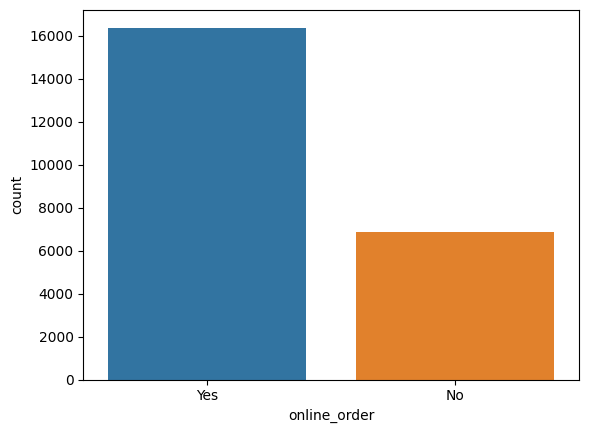

In [201]:
# EDA
sns.countplot(x='online_order',data=df)
plt.show()
# where the most of the hotels / restaurants offers Online Order to increase the sales.

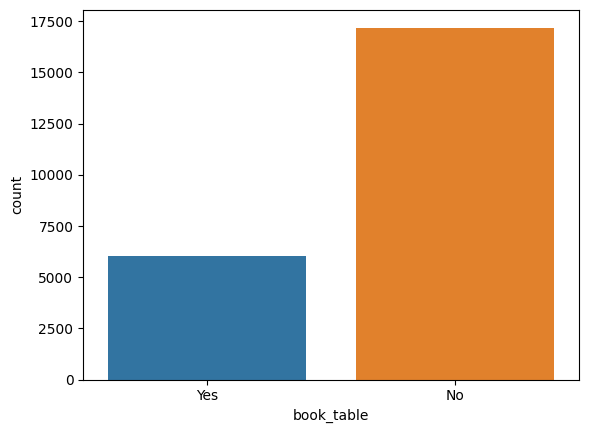

In [202]:
sns.countplot(x='book_table',data=df)
plt.show()
# most of the hotels / restaurants dont offer on booking table.

In [203]:
# average rating of a restaurant
df['rate'].mean()

3.905781142463868

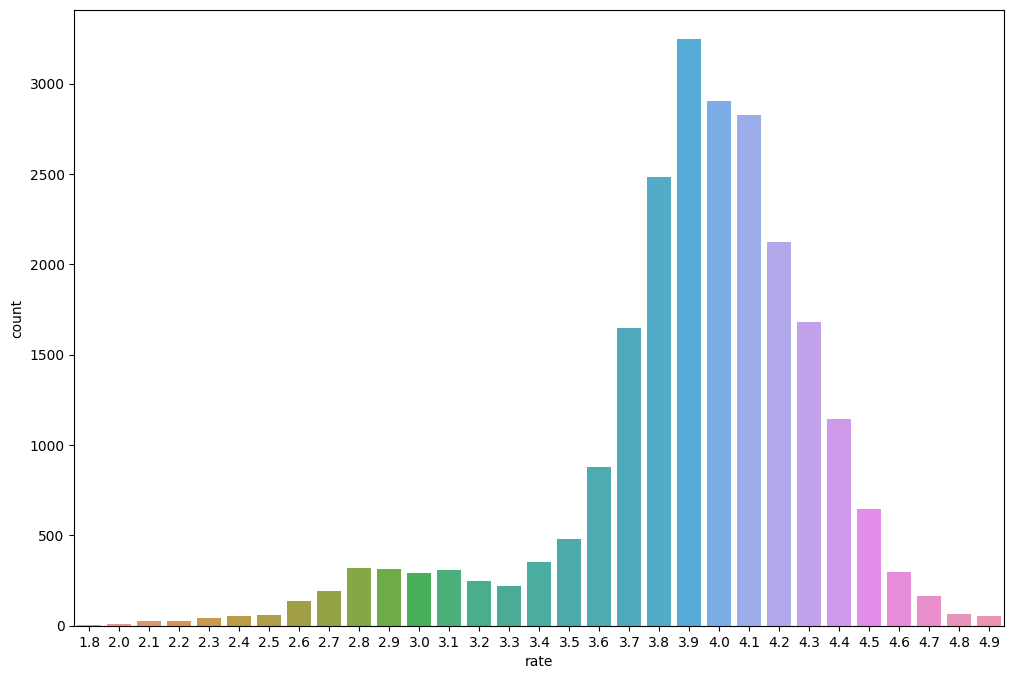

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x='rate',data=df)
plt.show()

3000 + restaurants are rated 3.9 and 2500 + restaurants are rated 4.0.

In [205]:
df[df['rate']==4.9].sort_values('votes',ascending=False).head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
50059,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
49627,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road
49170,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
3921,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
4944,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
4801,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur
37099,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6490,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', 'RATED\n Thapush and Rahul ser...",[],Dine-out,Koramangala 7th Block
21279,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6452,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', 'RATED\n Undoubtedly the best ...",[],Dine-out,Jayanagar
19393,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar
23587,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Dine-out,JP Nagar


In [206]:
# avg votes where the restaurant got
int(df['votes'].mean())

605

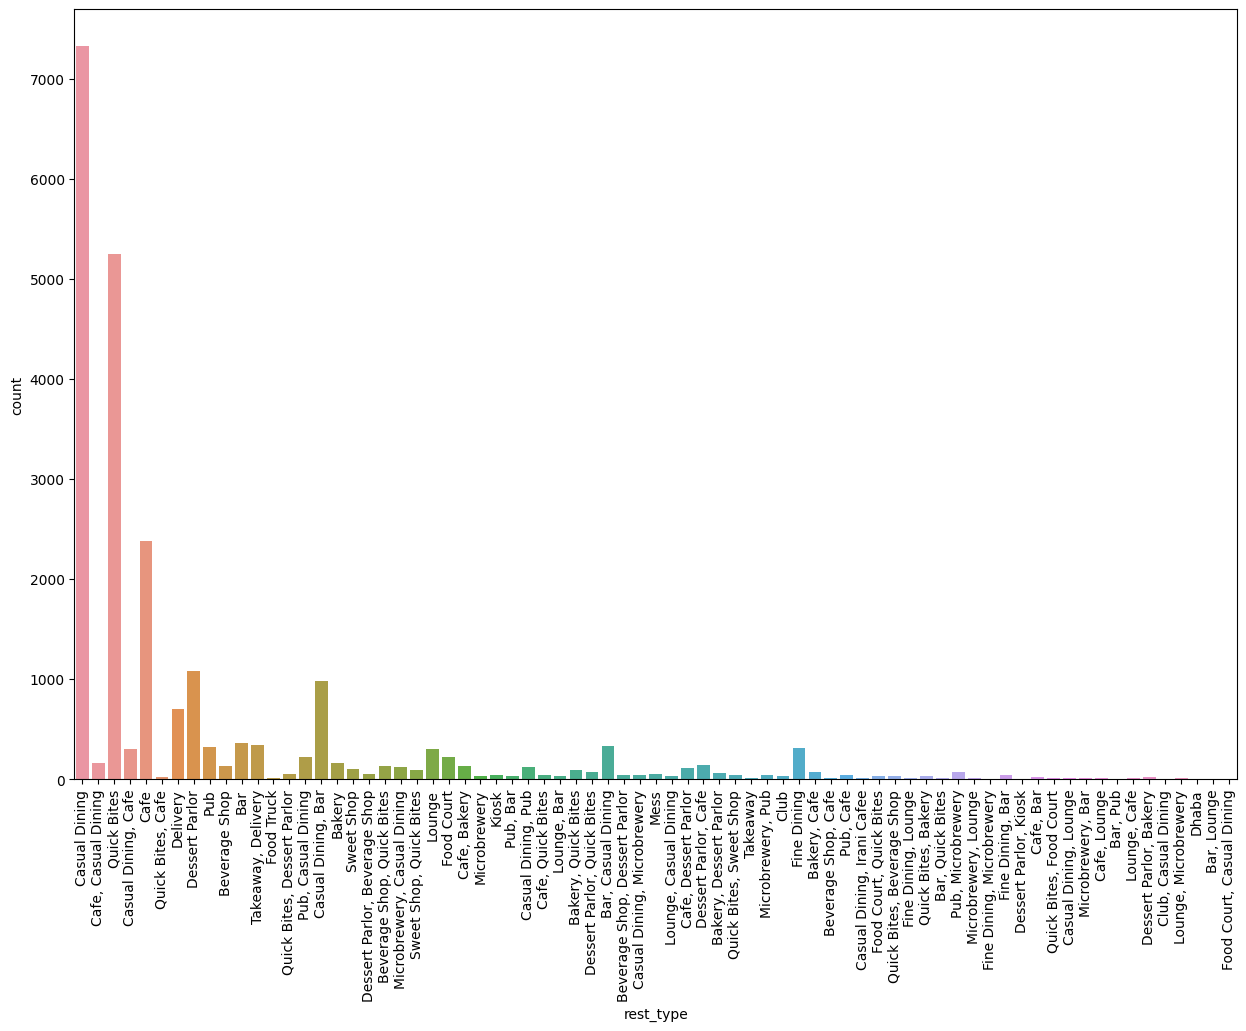

In [207]:
plt.figure(figsize=(15,10))
sns.countplot(x='rest_type',data=df)
plt.xticks(rotation=90)
plt.show()

In [208]:
dish_list=[]
for dish in df['dish_liked']:
  dish_list.extend(dish.split(','))


In [209]:
dish_freq={}
for dish in dish_list:
  dish_freq[dish]=dish_freq.get(dish,0)+1

In [210]:
top_10=sorted(dish_freq.items(),key=lambda dish:dish[1],reverse=True)[:10]

In [211]:
dish=[i[0] for i in top_10]
dish_count=[i[1] for i in top_10]

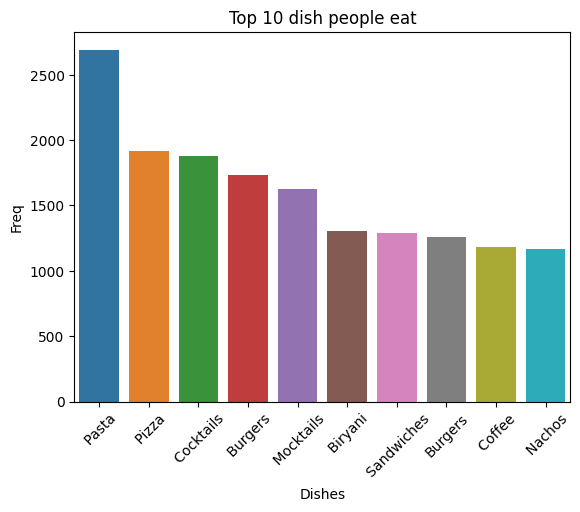

In [212]:
sns.barplot(x=dish,y=dish_count)
plt.title('Top 10 dish people eat')
plt.xlabel('Dishes')
plt.ylabel('Freq')
plt.xticks(rotation=45)
plt.show()

In [213]:
# avg approx_cost(for two people) - per order in zomato
int(df['cost'].mean())

753

In [214]:
# avg cost (for one people)- per order in zomato
int(df['cost'].mean()/2)

376

<ipython-input-215-9abf32dde030>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


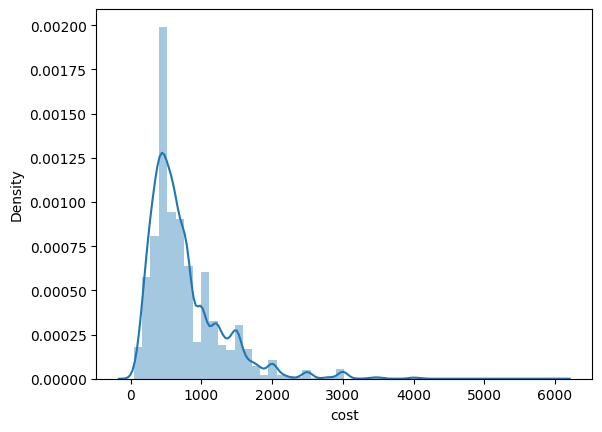

In [215]:
sns.distplot(df['cost'])
plt.show()

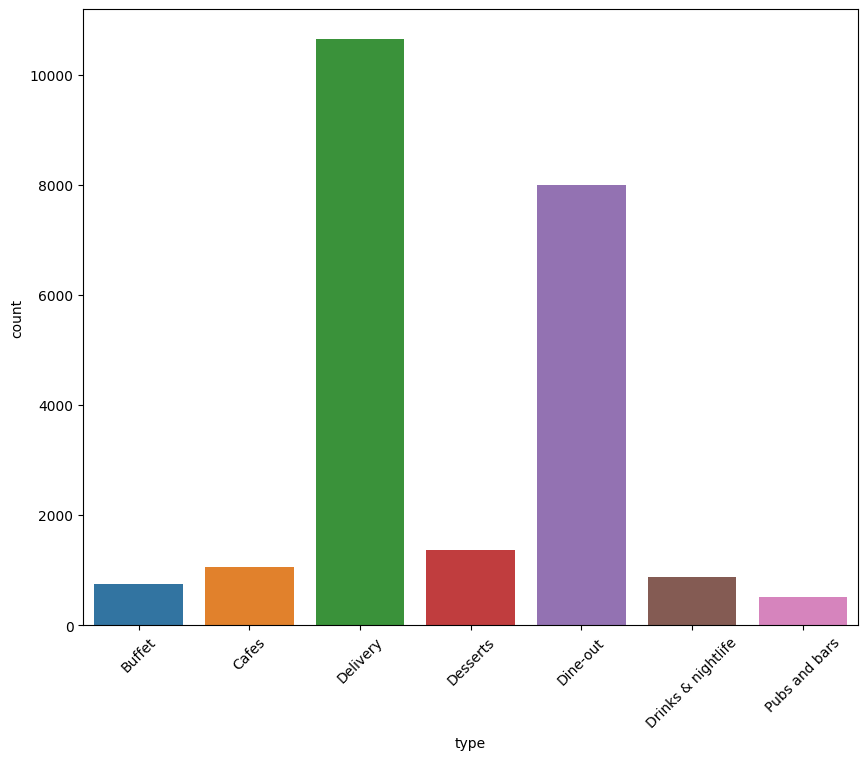

In [216]:
plt.figure(figsize=(10,8))
sns.countplot(x='type',data=df)
plt.xticks(rotation=45)
plt.show()

Here the two main service types are Delivery and Dine-out.

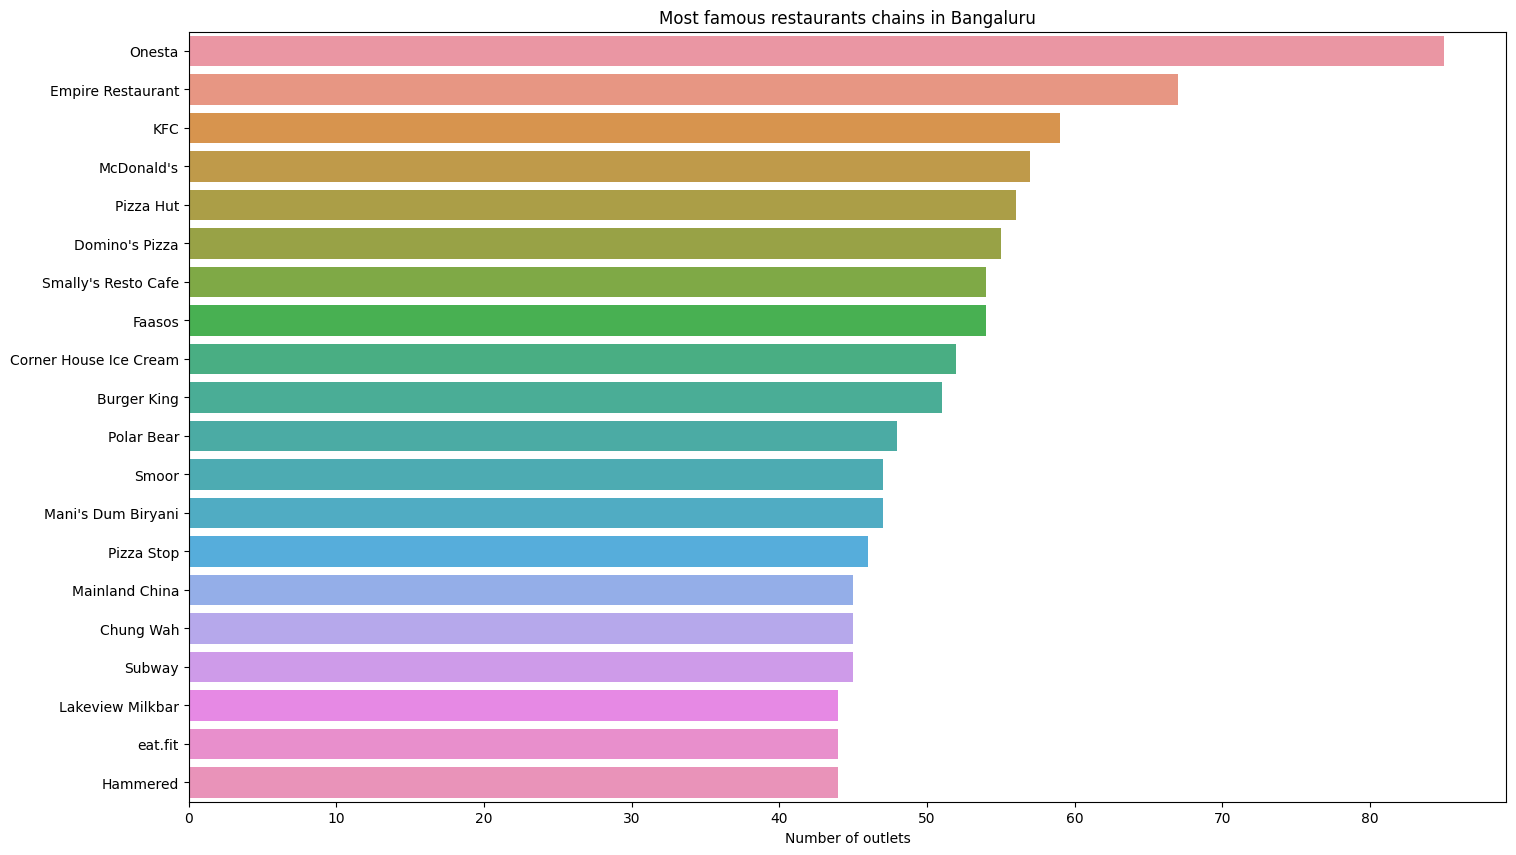

In [217]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains.values,y=chains.index)
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

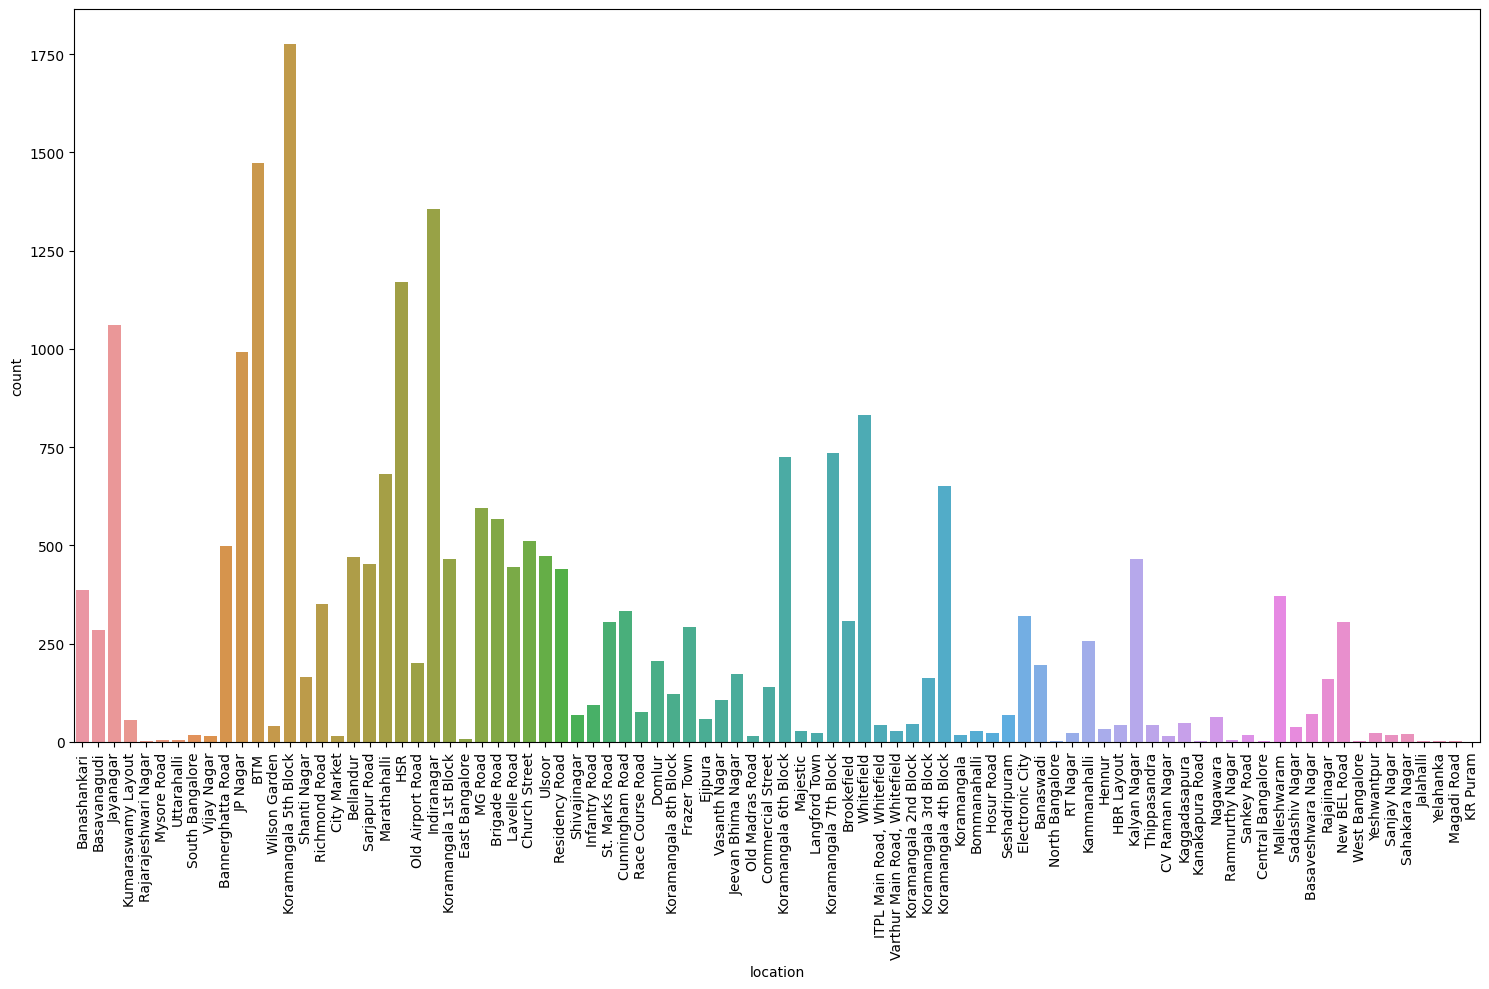

In [218]:
# Most restaurants are in this places and get more ordered too.
plt.figure(figsize=(15,10))
sns.countplot(x='location',data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [219]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [220]:
mapper={'Yes':1,'No':0}

In [221]:
df['online_order']=df['online_order'].map(mapper)
df['book_table']=df['book_table'].map(mapper)

In [223]:
le = LabelEncoder()

In [224]:
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['type']=le.fit_transform(df['type'])

In [225]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0,Banashankari


In [228]:
# splitting the data
x=df[['online_order','book_table','votes','location','rest_type','cuisines','cost','type']]
y=df['rate']

In [236]:
scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [237]:
x_scaled.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,type
0,0.647661,1.684697,0.152232,-1.484306,-0.630710,1.106583,0.089342,-2.241266
1,0.647661,-0.593579,0.163007,-1.484306,-0.630710,-0.566221,0.089342,-2.241266
2,0.647661,-0.593579,0.280635,-1.484306,-0.825770,-0.798555,0.089342,-2.241266
3,-1.544017,-0.593579,-0.464640,-1.484306,1.417419,1.531120,-0.871345,-2.241266
4,-1.544017,-0.593579,-0.394602,-1.355332,-0.630710,1.148825,-0.294933,-2.241266


In [240]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=42)

In [241]:
# Model Building

model_lreg=LinearRegression()
model_lreg.fit(x_train,y_train)

LinearRegression()

In [250]:
y_pred=model_lreg.predict(x_test)
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE :',math.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.22325400104024473
RMSE : 0.3812330977462352


In [312]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(n_estimators=1000,max_depth=9,random_state=42,)
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [313]:
y_pred=model_xgb.predict(x_test)
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE :',math.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.9450672983755753
RMSE : 0.1013833330315614


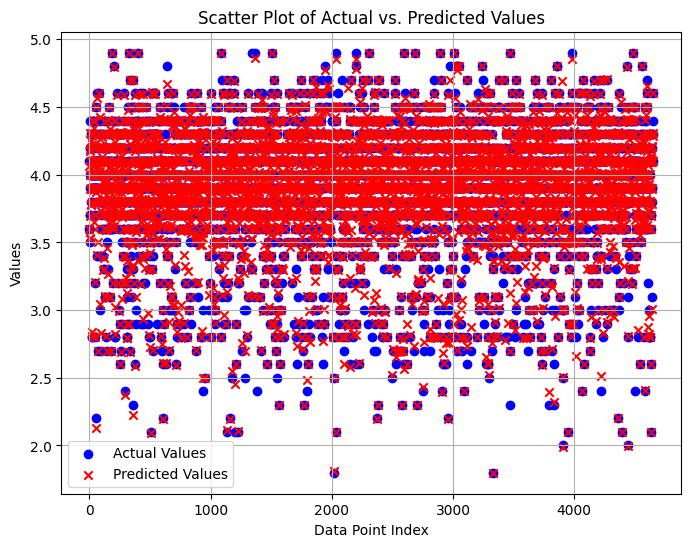

In [316]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)),y_pred, c='red', label='Predicted Values', marker='x')

plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()

plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)

plt.show()